In [1]:
is_Mac = True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
from pathlib import Path
import glob
import itertools
import matplotlib.animation as ani
import os

In [3]:
def GK_to_MeV(k):
    kelvin = k*(10**9)
    MeV = kelvin*8.61732814974493e-11
    return MeV

def kg_to_MeV(k):
    MeV = k*5.6095861672249e29
    return MeV

In [34]:
# enter your file directory for alterbbn_v2.2 
if not is_Mac:
    run_directory_h = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2_hannah/alter_vs.x'
    shell_val = True
    directory_h = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2_hannah'
    run_directory = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_vs.x'
    directory_h = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2'
else:
    run_directory_h = './alterbbn_v2.2_hannah/alter_vs.x'
    shell_val = False
    directory_h = 'alterbbn_v2.2_hannah'
    run_directory = './alterbbn_v2.2/alter_vs.x'
    directory = 'alterbbn_v2.2'


In [35]:
check_file = Path("evolution_vs.out")
 
if check_file.is_file():
        os.remove(check_file)   

In [60]:
dqdt_csv = np.loadtxt("alterbbn_v2.2/CSV Files/d_dqdt.csv", delimiter=',', usecols=1, unpack=True)[1:]
T_csv = np.loadtxt("alterbbn_v2.2/CSV Files/T_dqdt.csv", delimiter=',', usecols=1, unpack=True)[2:]

In [61]:
dqdt_csv.shape, T_csv.shape

((253,), (253,))

In [81]:
def run_new_code(csv):
    if csv:
        direc = directory
        run_direc = run_directory
    else:
        direc = directory_h
        run_direc = run_directory_h
    ch = subprocess.run(['make','-C', direc, 'clean'], capture_output = True, text = True, shell = shell_val)
    sh = subprocess.run(['make', '-C', direc, 'alter_vs.c'], capture_output = True, text = True, shell = shell_val) ##make clean and make stuff
    print(ch.stderr)
    print(sh.stderr)
    
    command = [run_direc, "14.87365053664758", "6.1e-10", "1", "255", "104.56255360706342", "300", "7e-05"]
    d = subprocess.run(command, capture_output = True, text = True, shell = shell_val)
    print(d.stderr)
    
    return make_arrays()

def make_arrays():
    text = open('evolution_vs.out', "r").readlines()

    aa = text[0]
    dict_temp = aa.split(',')
    dict_temp = [x.strip(' ') for x in dict_temp]
    #print(dict_temp)

    df = pd.DataFrame(columns = dict_temp)
    #print(df)
    for i in range(1, len(text)):
        a = text[i]
        b = a.split(',')
        df.loc[i] = b

    df = df.replace({'\n':''},regex=True)
    df = df.apply(pd.to_numeric)
    
    T = df['T (MeV)'].to_numpy()
    Tnu = df['Tnu (MeV)'].to_numpy()
    dQdt = df['sigma_rad (MeV^4)'].to_numpy() * T
    deu = df['Y(2H)'].to_numpy()
    
    plt.figure()
    plt.semilogx(T, T/Tnu)
    plt.xlim(max(T), min(T))
    plt.ylabel(r"$T/T_\nu$")
    plt.xlabel("T (MeV)")
    
    plt.figure()
    plt.loglog(T, np.abs(dQdt))
    plt.loglog(T_csv, dqdt_csv, 'o')
    plt.xlim(max(T), min(T))
    plt.ylabel("dQ/dt")
    plt.xlabel("T (MeV)")
    
    plt.figure()
    plt.loglog(T, deu)
    plt.xlim(max(T), min(T))
    plt.ylabel("Y(2H)")
    plt.xlabel("T (MeV)")

    return df, T, Tnu, dQdt, deu

def extract_array(df, key):
    return df[key].to_numpy()



make: Circular alter_vs.c <- alter_vs.c dependency dropped.
bbn_constraints.c:18:2: warning: array index 4 is past the end of the array (which contains 4 elements) [-Warray-bounds]
        translate[4]=5;  // He3_H=ratioH[5]
        ^         ~
bbn_constraints.c:13:5: note: array 'translate' declared here
    int translate[4];
    ^
1 warning generated.




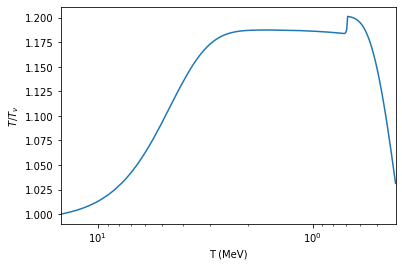

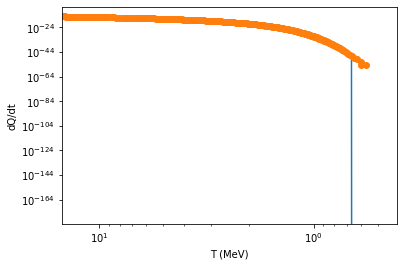

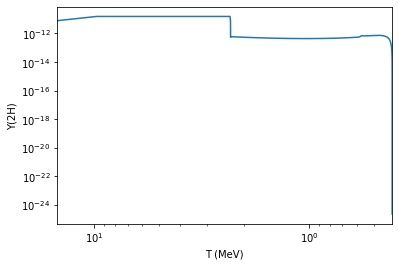

In [79]:
res = run_new_code(True)


make: Circular alter_vs.c <- alter_vs.c dependency dropped.
bbn_constraints.c:18:2: warning: array index 4 is past the end of the array (which contains 4 elements) [-Warray-bounds]
        translate[4]=5;  // He3_H=ratioH[5]
        ^         ~
bbn_constraints.c:13:5: note: array 'translate' declared here
    int translate[4];
    ^
1 warning generated.




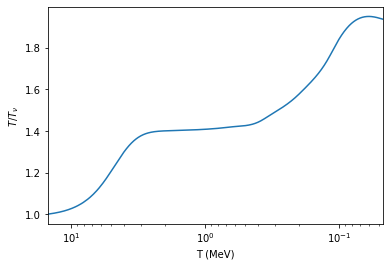

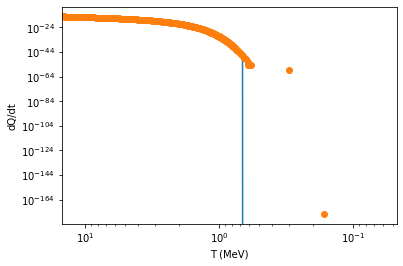

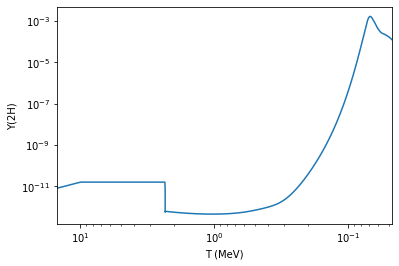

In [80]:
res_h = run_new_code(False)

(14.8737, 0.410427)

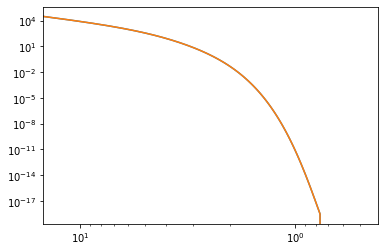

In [86]:
rns = extract_array(res[0], 'rho_vs(MeV^4)')
TT = extract_array(res[0], 'T (MeV)')

rns2 = extract_array(res_h[0], 'rho_vs(MeV^4)')
TT2 = extract_array(res_h[0], 'T (MeV)')

plt.figure()
plt.loglog(TT, rns)
plt.loglog(TT2, rns2)
plt.xlim(max(TT), min(TT))

(14.8737, 0.410427)

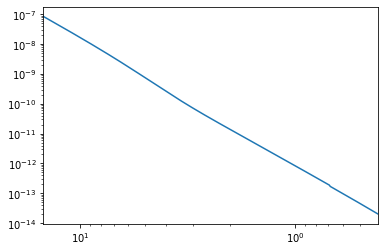

In [84]:
rn = extract_array(res[0], 'rho_{{nu}_{vs}}')
TT = extract_array(res[0], 'T (MeV)')

plt.figure()
plt.loglog(TT, rn)
plt.xlim(max(TT), min(TT))

In [112]:
def diff_plot(r, rh, key):
    rns = extract_array(r, key)
    TT = extract_array(r, 'T (MeV)')

    rns2 = extract_array(rh, key)
    TT2 = extract_array(rh, 'T (MeV)')

    plt.figure()
    plt.loglog(TT, rns)
    plt.loglog(TT2, rns2, linestyle='--')
    plt.ylabel(key)
    plt.xlim(max(TT2), min(TT2))
    
def diff_plot_all(r, rh):
    for i in range(r.shape[1]):
        diff_plot(r, rh, r.columns[i])

<ipython-input-112-c145230cdfe8>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


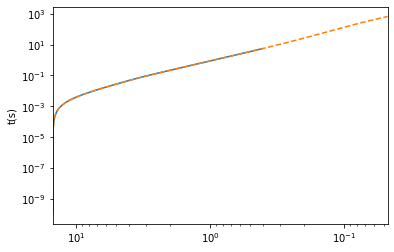

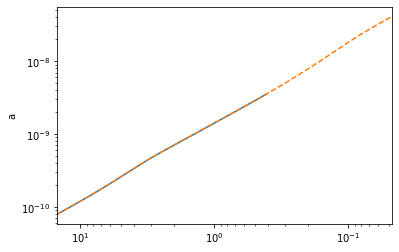

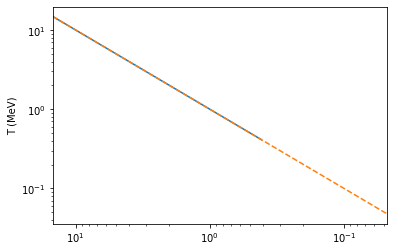

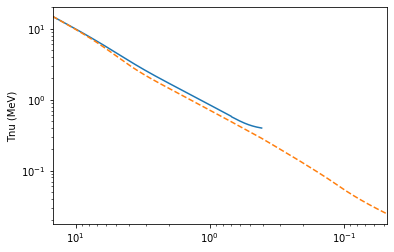

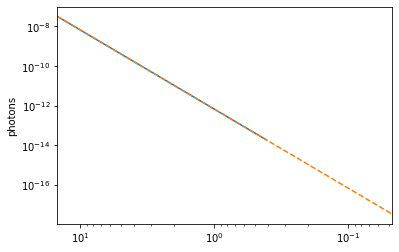

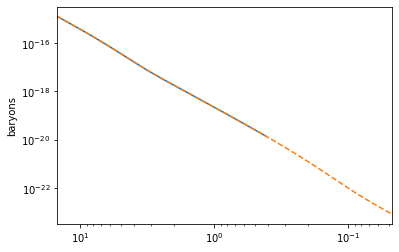

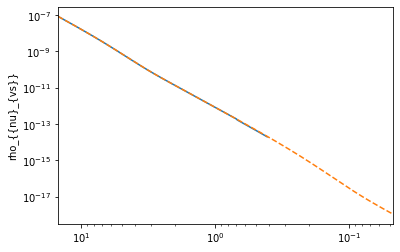

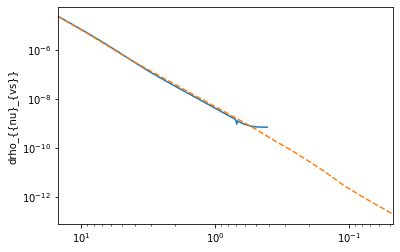

/Users/ckishimoto/opt/anaconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


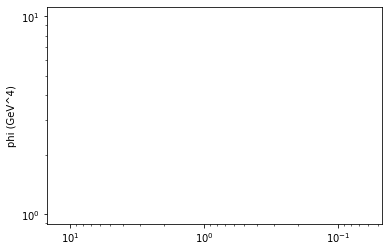

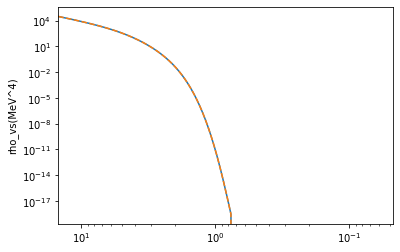

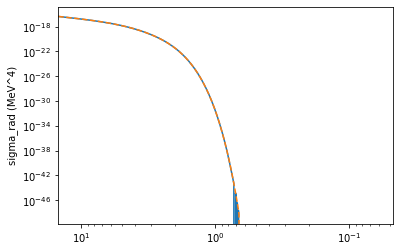

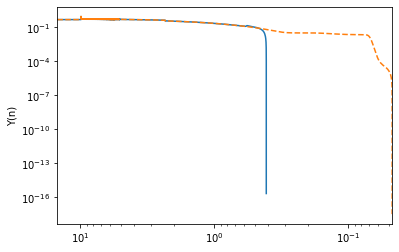

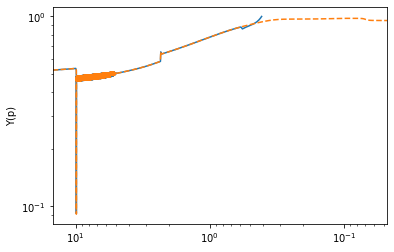

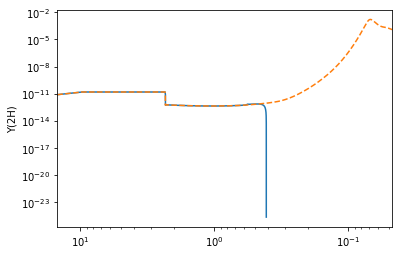

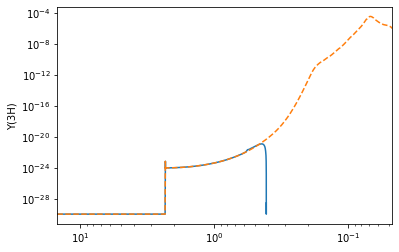

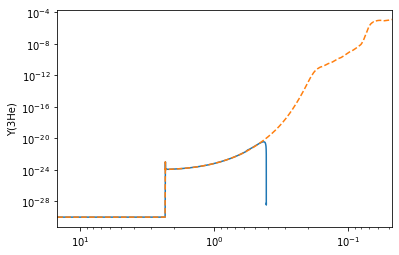

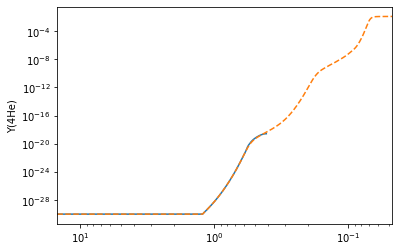

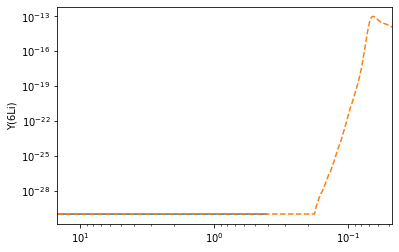

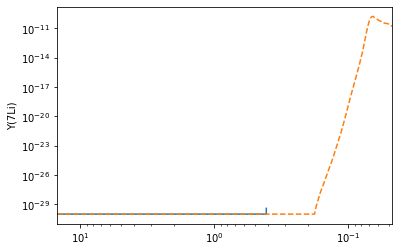

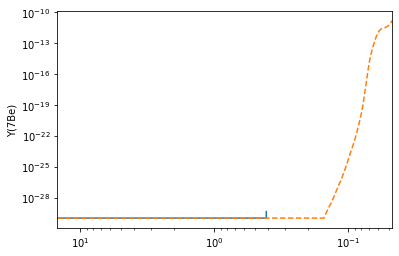

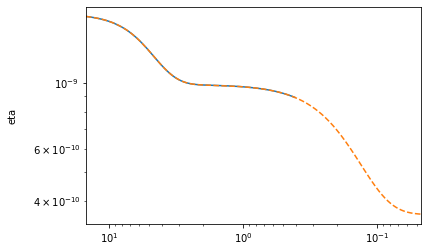

In [113]:
diff_plot_all(res[0], res_h[0])

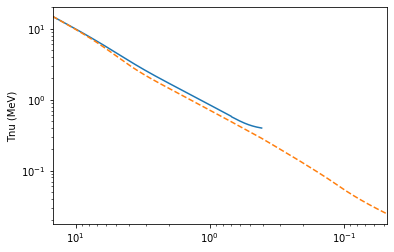

In [111]:
diff_plot(res[0], res_h[0], 'Tnu (MeV)')

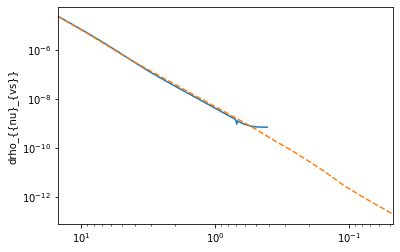

In [114]:
diff_plot(res[0], res_h[0], 'drho_{{nu}_{vs}}')

In [116]:
npz = np.load("alterbbn_v2.2/new_movie_arrays.npz")

In [117]:
npz.files

['T', 'dQdt', 'np', 'pn', 'rhonu']